# 뉴스 기사 분류: 다중 분류 문제

> 이전 섹션에서 완전 연결된 신경망을 사용해 벡터 입력을 어떻게 두 개의 클래스로 분류하는지 보았다.

> 이번 세션에서는 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만들어 보겠다. 클래스가 많기 때문에 이 문제는 다중 분류의 예이다. 

## 로이터 데이터셋

> 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용한다. 
- 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많다. 
- 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있다.

#1. 데이터셋 얻기

In [1]:
from keras.datasets import reuters
import numpy as np
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(train_data[0])
print(train_labels[0])

2121728/2110848 [==============================] - 0s 0us/step
8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [2]:
print(len(train_data[0]))

87


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
cate = to_categorical(train_data[0])
print(len(cate[0]))

4580


#2. 벡터 변환

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.

  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = train_labels
y_test = test_labels


In [ ]:
print(len(X_train))
print(len(X_train[0]))

8982
10000


In [ ]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=512,
    validation_data=(X_test, y_test)
)

Epoch 1/20
18/18 [==============================] - 1s 55ms/step - loss: 2.8466 - accuracy: 0.5104 - val_loss: 1.9509 - val_accuracy: 0.6443
Epoch 2/20
18/18 [==============================] - 1s 47ms/step - loss: 1.4761 - accuracy: 0.7132 - val_loss: 1.3450 - val_accuracy: 0.7271
Epoch 3/20
18/18 [==============================] - 1s 46ms/step - loss: 0.9696 - accuracy: 0.8051 - val_loss: 1.1090 - val_accuracy: 0.7671
Epoch 4/20
18/18 [==============================] - 1s 45ms/step - loss: 0.7082 - accuracy: 0.8638 - val_loss: 0.9936 - val_accuracy: 0.7841
Epoch 5/20
18/18 [==============================] - 1s 47ms/step - loss: 0.5360 - accuracy: 0.8937 - val_loss: 0.9268 - val_accuracy: 0.7939
Epoch 6/20
18/18 [==============================] - 1s 47ms/step - loss: 0.4176 - accuracy: 0.9175 - val_loss: 0.8897 - val_accuracy: 0.8001
Epoch 7/20
18/18 [==============================] - 1s 47ms/step - loss: 0.3330 - accuracy: 0.9339 - val_loss: 0.8671 - val_accuracy: 0.8019
Epoch 8/20
18

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

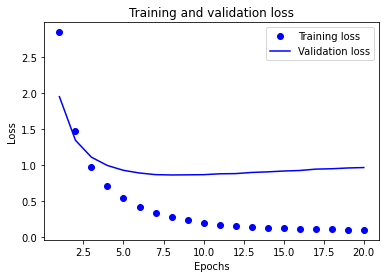

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

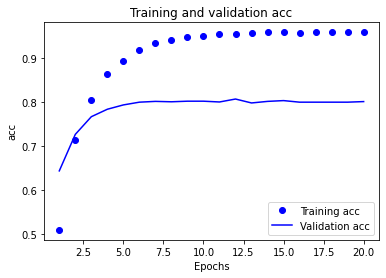

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9517 - accuracy: 0.8032


[0.9517373442649841, 0.8032057285308838]

> best = dense 128, ephochs = 13

#강사님 코드

##1. 데이터셋 얻기

In [6]:
from keras.datasets import reuters
import numpy as np
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(train_data[0])
print(train_labels[:10])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[ 3  4  3  4  4  4  4  3  3 16]


##2. 데이터 확인

###2.1 리뷰 확인

In [12]:
word_index = reuters.get_word_index()
word_index

reverse_word_index  = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

###2.2 labels 확인

In [14]:
import numpy as np

unique_elements, counts_elements = np.unique(train_labels, return_counts=True)
print('각 레이블에 대한 빈도수 : ')
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수 : 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


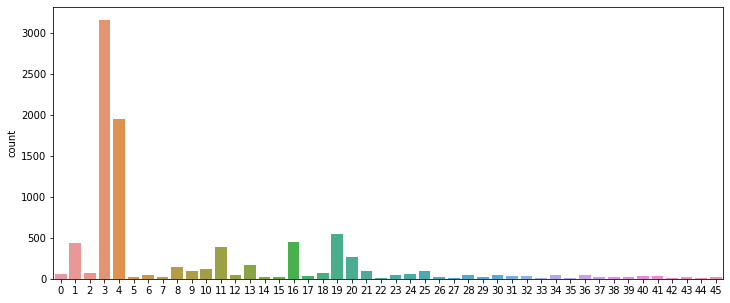

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(train_labels)

##3. 데이터 전처리

In [66]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [67]:
print(X_train[0])
print(len(X_train))
print(len(X_train[0]))

[0. 1. 1. ... 0. 0. 0.]
8982
10000


In [68]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [69]:
print(len(y_train))
print(len(y_train[0]))


8982
46


> labels 정보는 46개가 존재하며 위의 vetorize_sequences에 dimension=46으로 함수를 이용해도 되지만, 케라스에서 지원하는 to_categofical함수를 이용하여 원 핫 인코딩 처리를 해도 된다.

##4. 모델 구성

In [70]:
from keras import models
from keras import layers
model = models.Sequential()

#최종적으로 46개로 분류해야 하기 때문에 2의 승수 중 46보다 큰 최소값 64를 지정했다.
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))

#여러 개의 데이터를 얻기 위해 sofrmax를 사용했다.
#softmax는 여러개의 확률 데이터를 얻게 된다.
model.add(layers.Dense(46, activation='softmax'))

In [71]:
# optimizer는 여러 가지를 사용해 봐야 하며 adam이 가장 많이 사용된다.
# loss함수는 모델의 마지막 Dense가 어떠한 정보냐에 따라 달라진다.
# sigmoid = binary_crossentropy, softmax = categorinal_crossentropy
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

##5. 훈련 검증

###5.1 데이터 분리

In [72]:
X_train.shape

(8982, 10000)

In [73]:
validate_X_train = X_train[:1000]
partial_X_train = X_train[1000:]

validate_y_train = y_train[:1000]
partial_y_train = y_train[1000:]

In [74]:
validate_X_train[:2].view()

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [75]:
history = model.fit(partial_X_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(validate_X_train, validate_y_train)
)

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 2.6946 - accuracy: 0.5535 - val_loss: 1.7636 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4344 - accuracy: 0.7071 - val_loss: 1.3097 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0737 - accuracy: 0.7725 - val_loss: 1.1284 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8444 - accuracy: 0.8245 - val_loss: 1.0327 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6784 - accuracy: 0.8597 - val_loss: 0.9983 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5453 - accuracy: 0.8891 - val_loss: 0.9551 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4462 - accuracy: 0.9087 - val_loss: 0.9212 - val_accuracy: 0.8100
Epoch 8/20
16

###5.3 차트를 통한 결과 확인

In [76]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

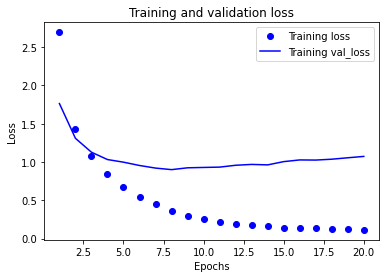

In [81]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

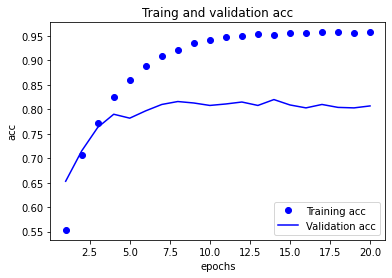

In [82]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Traing and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

> best epochs는 꾸준히 상승하는 9번째라고 할 수 ㅣ있다.

> 손실 함수에서 epochs가 9 이후에 훈련데이터는 손실 데이터가 0에 가까워 졌지만 검증 데이터는 점점 커졌다.

> 정확도에서는 epoch가 9이후 훈련데이터는 점점 1에 가까워졌지만 검증 데이터는 줄어든 것을 볼 수 있다.

>epoch가 9이후에 과적합 됨을 알 수 있다.

##6. 모델 다시 만들기

In [85]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train,
          epochs=9, batch_size=512,
          validation_data=(validate_X_train, validate_y_train))

Epoch 1/9
16/16 [==============================] - 1s 64ms/step - loss: 2.7747 - accuracy: 0.5045 - val_loss: 1.7945 - val_accuracy: 0.6340
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.4388 - accuracy: 0.7093 - val_loss: 1.3006 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.0489 - accuracy: 0.7777 - val_loss: 1.1204 - val_accuracy: 0.7660
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.8254 - accuracy: 0.8247 - val_loss: 1.0161 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6581 - accuracy: 0.8616 - val_loss: 0.9485 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5275 - accuracy: 0.8894 - val_loss: 0.9219 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 46ms/step - loss: 0.4284 - accuracy: 0.9112 - val_loss: 0.9086 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

###6.2 평가하기

In [86]:
results = model.evaluate(X_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9742 - accuracy: 0.7930


[0.9742058515548706, 0.792965292930603]

##7. 예측값 확인

In [88]:
pred = model.predict(X_test)
pred

array([[4.61117015e-05, 1.14906019e-04, 2.24414704e-04, ...,
        1.34254471e-04, 1.73722447e-06, 1.54033569e-05],
       [2.25767959e-03, 5.26250243e-01, 1.65170233e-03, ...,
        7.01265526e-06, 1.35544629e-03, 5.00958959e-05],
       [1.19997580e-02, 9.18305933e-01, 2.69310270e-03, ...,
        7.90440899e-05, 1.33869273e-03, 1.37137307e-04],
       ...,
       [7.47372087e-06, 3.32280215e-05, 1.08417116e-04, ...,
        3.29520590e-05, 7.87921181e-07, 5.31093719e-05],
       [2.93550128e-03, 5.78152686e-02, 1.90591998e-02, ...,
        1.44412380e-03, 1.75276748e-03, 3.91572062e-03],
       [1.35362661e-02, 7.12724626e-01, 7.25958869e-03, ...,
        2.83538626e-04, 4.53598361e-04, 2.22077084e-04]], dtype=float32)

> pred는 sortmax를 통해 얻은 값으로 각 행마다 46개의 데이터로 이루어져 있을 것이며, 이 중 가장 높은 확률을 갖는 값이 예측값이 된다.

In [104]:
print(len(pred[0]))
print(len(pred))
print(np.sum(pred[0]))

46
2246
0.9999999


> 전체 2246개의 결과가 있고 각각마다 46개의 원 핫 인코딩 리스트로 되어있다.

> 또한 전체 확률은 1이다. (아마도...)

In [ ]:
pred_list = []

for i in range(len(pred)):
  pred_list.append(pred[i].argmax())

In [94]:
pred_list[0]

3

> 원 핫 인코딩을 일차원 배열로 만들어준다.

In [99]:
labels = []

for i in range(len(y_test)):
  labels.append(y_test[i].argmax())

> y_test 도 일차원 배열로 만들어준다.

In [100]:
cnt = 0

for idx in range(len(pred_list)):
  if pred_list[idx] == labels[idx]:
    cnt += 1

print(cnt)

1781


In [103]:
print((cnt/len(y_test)))

0.7929652715939448


> y_test와 예측한 값을 비교해보면 대략 79%정도의 정확도를 확인할 수 있다.

In [106]:
for i in range(20):
  print('pred : ', pred_list[i], ' , label: ', labels[i], ' ', pred_list[i]==labels[i])
  print

pred :  3  , label:  3   True
pred :  1  , label:  10   False
pred :  1  , label:  1   True
pred :  16  , label:  4   False
pred :  13  , label:  4   False
pred :  3  , label:  3   True
pred :  3  , label:  3   True
pred :  3  , label:  3   True
pred :  3  , label:  3   True
pred :  3  , label:  3   True
pred :  1  , label:  5   False
pred :  4  , label:  4   True
pred :  1  , label:  1   True
pred :  3  , label:  3   True
pred :  1  , label:  1   True
pred :  11  , label:  11   True
pred :  3  , label:  23   False
pred :  3  , label:  3   True
pred :  19  , label:  19   True
pred :  3  , label:  3   True
